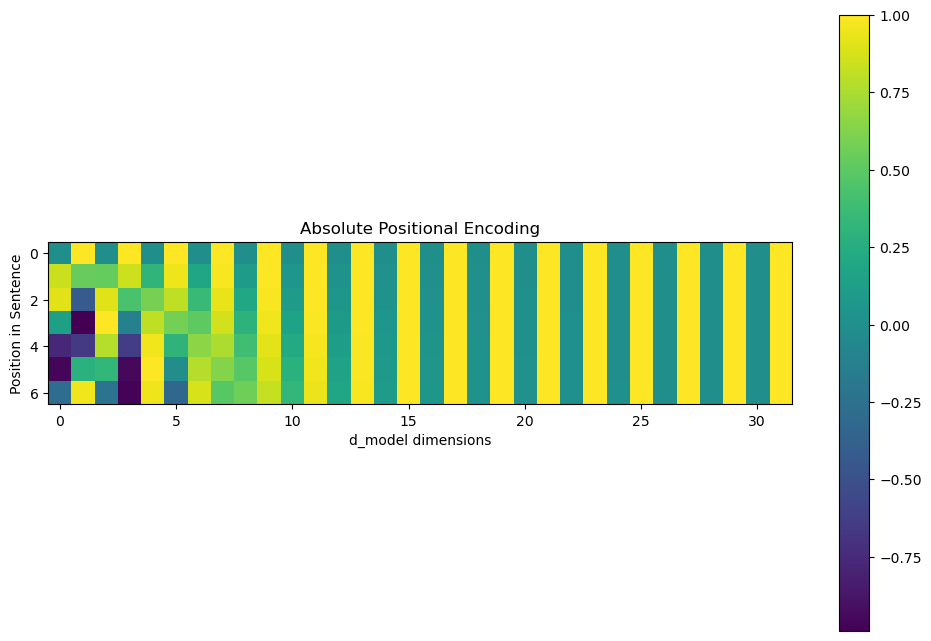

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_absolute_positional_encoding(seq_len, d_model):
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return pe

# 假设句子长度为8，d_model为32
sentence = "我爱你，中国。"
seq_len = len(sentence)
d_model = 32

absolute_positional_encoding = get_absolute_positional_encoding(seq_len, d_model)

# 展示绝对位置编码的效果
plt.figure(figsize=(12, 8))
plt.imshow(absolute_positional_encoding, cmap='viridis')
plt.colorbar()
plt.title("Absolute Positional Encoding")
plt.xlabel("d_model dimensions")
plt.ylabel("Position in Sentence")
plt.show()

In [3]:

import torch
import torch.nn.functional as F

class RelativePositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(RelativePositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

        # 生成相对位置编码
        self.relative_positions_matrix = self.generate_relative_positions_matrix(max_len)
        self.embeddings_table = self.create_embeddings_table(max_len, d_model)

    def generate_relative_positions_matrix(self, length):
        range_vec = torch.arange(length)
        distance_mat = range_vec[None, :] - range_vec[:, None]
        return distance_mat

    def create_embeddings_table(self, max_len, d_model):
        table = torch.zeros(max_len, max_len, d_model)
        for pos in range(-max_len+1, max_len):
            table[:, pos] = self.get_relative_positional_encoding(pos, d_model)
        return table

    def get_relative_positional_encoding(self, pos, d_model):
        pos_encoding = torch.zeros(d_model)
        for i in range(0, d_model, 2):
            pos_encoding[i] = torch.sin(pos / (10000 ** ((2 * i)/d_model)))
            if i + 1 < d_model:
                pos_encoding[i + 1] = torch.cos(pos / (10000 ** ((2 * i)/d_model)))
        return pos_encoding

    def forward(self, length):
        positions_matrix = self.relative_positions_matrix[:length, :length]
        return F.embedding(positions_matrix, self.embeddings_table)

# 使用相对位置编码
sentence_length = len(sentence)
relative_positional_encoding = RelativePositionalEncoding(d_model, max_len=sentence_length)
relative_positional_encodings = relative_positional_encoding(sentence_length)

# 展示相对位置编码的效果
plt.figure(figsize=(12, 8))
plt.imshow(relative_positional_encodings.detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Relative Positional Encoding")
plt.xlabel("d_model dimensions")
plt.ylabel("Relative Position")
plt.show()



TypeError: sin(): argument 'input' (position 1) must be Tensor, not float

In [8]:
import h5py

In [12]:
embedding_dir='/home/yuhaowang/data/embedding/TCGA-LUAD'
import os
test_case=os.listdir(embedding_dir)[2]

In [13]:
def read_assets_from_h5( h5_path: str) -> tuple:
    '''Read the assets from the h5 file'''
    assets = {}
    attrs = {}
    with h5py.File(h5_path, 'r') as f:
        for key in f.keys():
            assets[key] = f[key][:]
            if f[key].attrs is not None:
                attrs[key] = dict(f[key].attrs)
    return assets, attrs

In [16]:
res,_=read_assets_from_h5(os.path.join(embedding_dir,test_case))

In [20]:
res

{'cluster_centers': array([[ 0.06074125, -0.04797647,  0.0314041 , ..., -0.00976407,
          0.01675332, -0.00295427],
        [ 0.05002979, -0.04412391,  0.02896007, ...,  0.00101928,
          0.0109681 , -0.02167385],
        [ 0.04838791, -0.04288549,  0.01721936, ...,  0.00459621,
         -0.00435249, -0.03027587],
        ...,
        [ 0.04690852, -0.06893064,  0.07062602, ..., -0.02154604,
          0.00104492,  0.0054438 ],
        [ 0.0498773 , -0.03476577,  0.03767053, ..., -0.02402386,
          0.00083551, -0.01236775],
        [ 0.04598414, -0.03954945,  0.03422585, ..., -0.00312588,
          0.00804252, -0.03439237]]),
 'coords': array([[  824, 57945],
        [  824, 58969],
        [  824, 59993],
        ...,
        [86841, 46680],
        [86841, 47704],
        [87865, 45656]]),
 'features': array([[ 0.07768731,  0.01407234,  0.0958391 , ..., -0.00307684,
          0.01369488, -0.02950972],
        [ 0.01849896,  0.03556122,  0.07713094, ..., -0.01821687,
     

In [18]:
res['cluster_centers'].shape

(50, 384)

In [42]:
def calculate_similarity(vec1, vec2):

    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    distance = np.linalg.norm(vec1 - vec2)
    return distance

In [ ]:
cluster_key=2


array([ 281,  282,  323,  324,  363,  365,  405,  406,  407,  408,  452,
        453,  454,  455,  456,  497,  503,  504,  505,  543,  544,  545,
        546,  547,  548,  549,  589,  591,  592,  593,  635,  637,  638,
        639,  640,  643,  687,  689,  733,  736,  784,  785,  787,  835,
        836,  837,  890,  891,  892,  894,  896,  947,  948,  949,  950,
        951,  955, 1003, 1004, 1005, 1008, 1065, 1066, 1106, 1128, 1132,
       1134, 1178, 1188, 1190, 1192, 1193, 1194, 1196, 1230, 1231, 1233,
       1234, 1235, 1236, 1244, 1254, 1255, 1256, 1257, 1261, 1265, 1266,
       1293, 1300, 1301, 1302, 1303, 1304, 1314, 1320, 1321, 1322, 1323,
       1324, 1325, 1329, 1330, 1333, 1334, 1362, 1365, 1367, 1368, 1369,
       1370, 1372, 1382, 1387, 1388, 1390, 1391, 1392, 1393, 1396, 1397,
       1398, 1400, 1401, 1428, 1431, 1433, 1435, 1454, 1455, 1456, 1457,
       1459, 1460, 1461, 1462, 1463, 1466, 1467, 1468, 1498, 1500, 1505,
       1517, 1518, 1524, 1525, 1527, 1530, 1531, 15

In [63]:
for i in range(50):
    indexs=np.where(res['labels']==i)[0]

    similarity_list=[]
    for index in indexs:
        # print(index)
        # print(res['features'][index].shape)
        #print(calculate_similarity(res['cluster_centers'][cluster_key],res['features'][index]))
        similarity_list.append(calculate_similarity(res['cluster_centers'][cluster_key],res['features'][index]))
    #compute kmenas similarity between res['cluster_centers'][cluster_key] and res['features'][index]
    print(min(similarity_list),max(similarity_list))


0.49695843164585723 0.8347871627300506
0.6865236112231249 0.9206541320373542
0.15965947397005326 0.3886289260592855
0.5463448226732246 0.8969584405896887
0.7472923550046136 0.913104967742602
0.6079110619859472 1.0392453874847447
0.3880827293651171 0.691375986283879
0.5375631440688109 1.131094084409436
0.577325906208356 0.8281451973132208
0.23379568810142462 0.574613758769568
0.736016566932542 1.008504722876743
0.5667063595865213 0.845059450720478
0.2636339688765211 0.5309647924300439
0.5081500680495393 0.8150117461292699
0.7196179659224526 0.9092553250641179
0.5621899612018695 0.9135726482406058
0.4297852477956964 0.6850388272655397
0.7182926582686625 0.9273319825336368
0.3908901581592258 0.6542563182124227
0.7322446405390921 0.8889480290693409
0.39024666581634665 0.7257141121833522
0.7526356817616439 0.9521748493245944
0.7049623906709864 0.9066033995841241
0.4299710427148452 1.0511538719267186
0.6266003892195126 0.8599956459095797
0.3896535707301488 0.8084717746519425
0.20135835035714

In [64]:
a=torch.rand([10, 1367, 384])
b=torch.rand([10, 2734, 384])

In [ ]:
#define a decoder that takes a tensor of (10, 2734, 384) and returns a tensor of shape (10, 1367, 384)
decoder=

RuntimeError: The shape of the 2D attn_mask is torch.Size([2734, 2734]), but should be (10, 10).

In [68]:
from torch import (
randn,
)
batch_size = 10
n_tokens = 1367
token_dim = 384

# tokens is currently a dummy tensor.
# Later, it will be replaced by the actual tokens
tokens = randn(batch_size, n_tokens, token_dim)


In [75]:
from torch import (
randn,
zeros,
)


tokens = randn(batch_size, n_tokens, token_dim)

indices_to_mask = randn(batch_size, n_tokens)

n_masked_tokens = int(0.25*n_tokens)

indices_to_mask = indices_to_mask.topk(k=n_masked_tokens,dim=1,)
indices_to_mask = indices_to_mask.indices
bitmask = zeros(batch_size, n_tokens)

bitmask = bitmask.scatter(dim=1,index=indices_to_mask,value=1,)
bitmask = bitmask.bool()

In [ ]:
import einops
from einops import (
rearrange,
)
from torch import (
randn,
zeros,
)
from torch.nn import (
Linear,
Parameter,
)
from torch.nn.functional import (
l1_loss,
)


tokens =torch.rand([10, 1367, 384])

mask_token = torch.nn.Parameter(torch.randn(token_dim))

mask_tokens = self.mask_token.repeat(batch_size, n_tokens, 1)

indices_to_mask = randn(batch_size, n_tokens)

n_masked_tokens = int(0.5*n_tokens)

indices_to_mask = indices_to_mask.topk(
k=n_masked_tokens,
dim=1,
)

indices_to_mask = indices_to_mask.indices
bitmask = zeros(batch_size, n_tokens)

bitmask = bitmask.scatter(
dim=1,
index=indices_to_mask,
value=1,
)
bitmask = bitmask.bool()

bitmask = bitmask.unsqueeze(2)

tokens = (~bitmask)*tokens + bitmask*mask_tokens

tokens = tokens+vit.pos_embed[:, 1:]

encoded = vit.blocks(tokens)

bitmask = bitmask.squeeze(2)

masked_tokens_encoded = encoded[bitmask]

patch_height = patch_width = vit.patch_embed.patch_size

decoder_out_dim = 3*patch_height*patch_width
decoder = Linear(
in_features=token_dim,
out_features=decoder_out_dim,
)

masked_patches_reconstructed = decoder(masked_tokens_encoded)

pattern = (
'batch_size n_channels (n_patches_height patch_height) (n_patches_width patch_width) -> '
'batch_size (n_patches_height n_patches_width) (n_channels patch_height patch_width)'
)

patches = einops.rearrange(
tensor=input,
pattern=pattern,
patch_height=patch_height,
patch_width=patch_width,
)

maskes_patches_original = patches[bitmask]

# The loss is the L1 difference between
# the predicted pixel values and the ground truth,
# divided by the number of masked patches
loss = l1_loss(
input=masked_patches_reconstructed,
target=maskes_patches_original,
)/n_masked_tokens

NameError: name 'vit' is not defined